# Clustering

## Dataset

We‘ll use "201707-citibike-tripdata.csv.zip" (after preprocessed in HW0)

## Schema

- Every station’s information
    - id, name, lat, lng
- Every stations’ flow data
    - id, time, in-flow, out-flow

### Import packages

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import os
from time import time
from plotly.graph_objs import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from sklearn import manifold
%matplotlib inline

### Read csv to dataframe
use pandas to read data

In [348]:
# preprocessed dataset
df = pd.read_csv('./201707-citibike-tripdata-preprocessed.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [349]:
# every station's information
station_info = pd.read_csv('./station_info.csv')
station_info.head()

,station id,station name,station latitude,station logitude
0,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241
1,293,Lafayette St & E 8 St,40.730207,-73.991026
2,3242,Schermerhorn St & Court St,40.691029,-73.991834
3,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198
4,361,Allen St & Hester St,40.716059,-73.991908


In [350]:
# every station's in-flow data
station_in_flow = pd.read_csv('./in_flow.csv')
station_in_flow.head()

,72,79,82,83,116,119,120,127,128,143,...,2003,2005,2006,2008,2009,2010,2012,2021,2022,2023
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0
2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [351]:
# every station's out-flow data
station_out_flow = pd.read_csv('./out_flow.csv')
station_out_flow.head()

,72,79,82,83,116,119,120,127,128,143,...,2003,2005,2006,2008,2009,2010,2012,2021,2022,2023
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Spatial clustering

Using stations’ geo-information to do clustering,try the following algorithm and try different parameters and explain the results

In [352]:
station_geo = station_info[['station logitude', 'station latitude']]
station_geo.head()

,station logitude,station latitude
0,-73.960241,40.715348
1,-73.991026,40.730207
2,-73.991834,40.691029
3,-73.963198,40.716887
4,-73.991908,40.716059


In [353]:
station_geo.describe()

,station logitude,station latitude
count,634.000000,634.000000
mean,-73.979194,40.727318
std,0.021919,0.036300
min,-74.066921,40.655400
25%,-73.994128,40.696093
50%,-73.981324,40.724055
75%,-73.961923,40.754918
max,-73.896602,40.880921


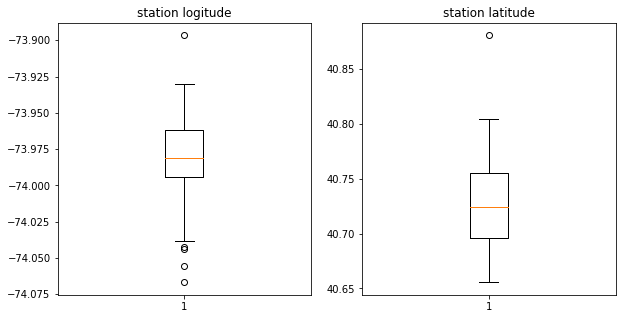

In [354]:
def show_box(df):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
    i = 1
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64:
            ax = plt.subplot(1, 2, i)
            plt.boxplot(df[col])
            ax.set_title(col)
            i += 1
    plt.show()

show_box(station_geo)

### Kmeans

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

The problem is computationally difficult (NP-hard); however, there are efficient heuristic algorithms that are commonly employed and converge quickly to a local optimum. These are usually similar to the expectation-maximization algorithm for mixtures of Gaussian distributions via an iterative refinement approach employed by both algorithms. Additionally, they both use cluster centers to model the data; however, k-means clustering tends to find clusters of comparable spatial extent, while the expectation-maximization mechanism allows clusters to have different shapes.

The algorithm has a loose relationship to the k-nearest neighbor classifier, a popular machine learning technique for classification that is often confused with k-means because of the k in the name. One can apply the 1-nearest neighbor classifier on the cluster centers obtained by k-means to classify new data into the existing clusters. This is known as nearest centroid classifier or Rocchio algorithm.

In [377]:
def test_Kmeans(data, n_clusters):
    X = data
    X = StandardScaler().fit_transform(X)
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    pl.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
    pl.show()

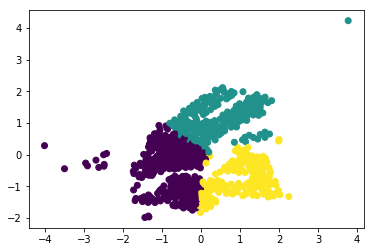

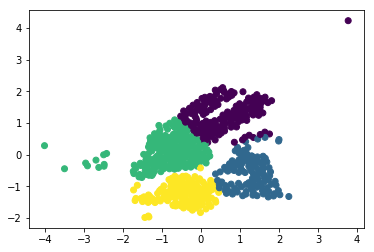

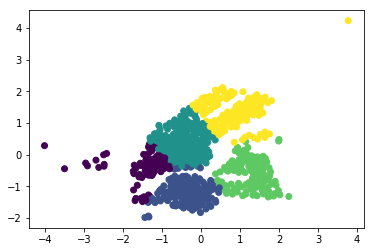

In [376]:
for i in xrange(3, 6):
    test_Kmeans(station_geo, i)

### DBscan

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

In 2014, the algorithm was awarded the test of time award (an award given to algorithms which have received substantial attention in theory and practice) at the leading data mining conference, KDD.

In [362]:
def test_DBscan(data, eps, min_samples, metric):
    # #############################################################################
    # Load data and standardize the value
    X = data
    X = StandardScaler().fit_transform(X)

    # #############################################################################
    # Compute DBSCAN
    db = DBSCAN(eps = eps, min_samples = min_samples, metric = metric).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.6f"
          % metrics.silhouette_score(X, labels))

    # #############################################################################
    # Plot result
    # Black removed and is used for noise instead
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=8)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=2)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

Estimated number of clusters: 4
Silhouette Coefficient: 0.210977


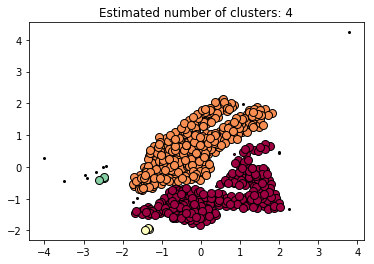

Estimated number of clusters: 2
Silhouette Coefficient: 0.332690


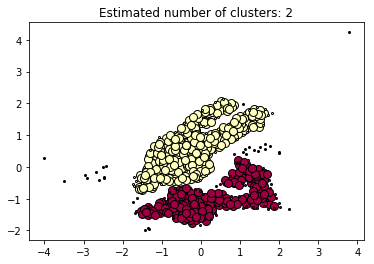

Estimated number of clusters: 9
Silhouette Coefficient: 0.010581


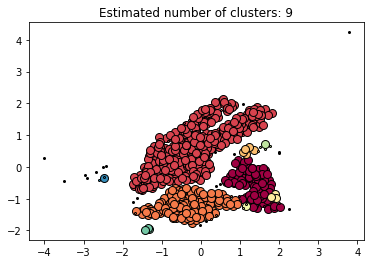

Estimated number of clusters: 6
Silhouette Coefficient: 0.108665


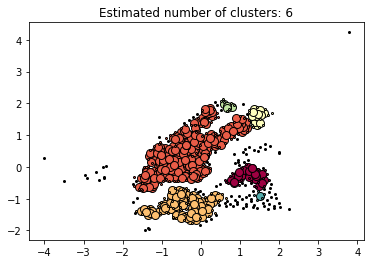

In [378]:
manhattan = lambda X, Y: abs(X - Y).sum()
euclidean = lambda X, Y: distance.euclidean(X, Y)

test_DBscan(station_geo, 0.2, 3, euclidean)
test_DBscan(station_geo, 0.2, 6, euclidean)
test_DBscan(station_geo, 0.2, 3, manhattan)
test_DBscan(station_geo, 0.2, 6, manhattan)

## Temporal clustering

Using the in-flow and out-flow data in the first week(7 days * 48 segment * 2 = 672 data points for each sensor) try the following methods

In [390]:
tmp_in_flow = pd.DataFrame(station_in_flow.head(n = 7 * 48))
tmp_out_flow = pd.DataFrame(station_out_flow.head(n = 7 * 48))

tmp_in_flow.head()

,72,79,82,83,116,119,120,127,128,143,...,2003,2005,2006,2008,2009,2010,2012,2021,2022,2023
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0
2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [391]:
tmp_out_flow.head()

,72,79,82,83,116,119,120,127,128,143,...,2003,2005,2006,2008,2009,2010,2012,2021,2022,2023
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Agglomerative Clustering

This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

In [383]:
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], '0',
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

def test_Agg(data, linkage, n_clusters, affinity):
    X = data
    X_red = manifold.SpectralEmbedding(n_components = 2).fit_transform(X)

    clustering = AgglomerativeClustering(linkage = linkage, n_clusters = n_clusters, affinity = affinity)
    t0 = time()
    clustering.fit(X_red)
    print("Estimated number of clusters: %s" % len(set(clustering.labels_)))
    print("%s : %.6fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s affinity" % affinity)
    plt.show()

Estimated number of clusters: 4
average : 0.002615s


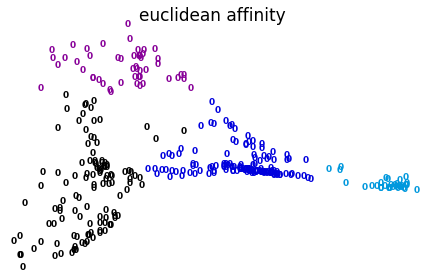

Estimated number of clusters: 4
average : 0.002826s


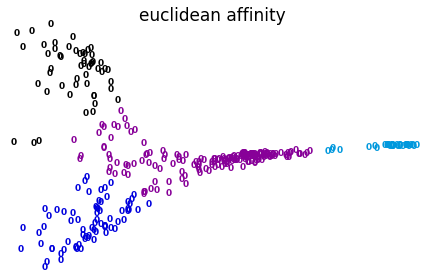

Estimated number of clusters: 4
average : 0.002883s


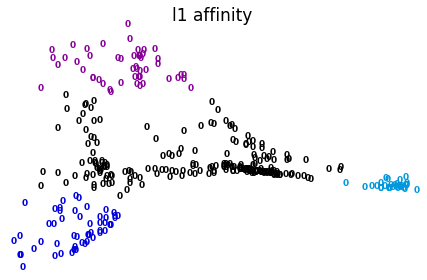

Estimated number of clusters: 4
average : 0.002324s


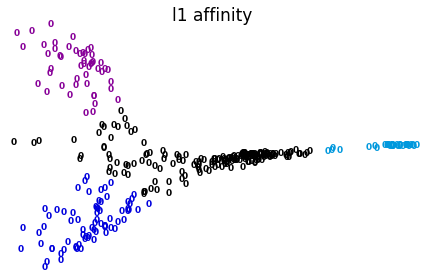

Estimated number of clusters: 4
average : 0.002414s


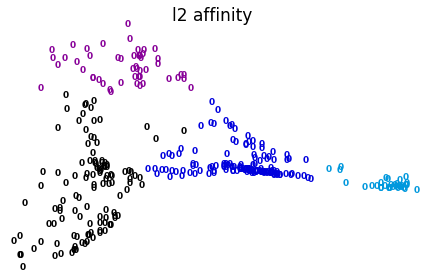

Estimated number of clusters: 4
average : 0.002440s


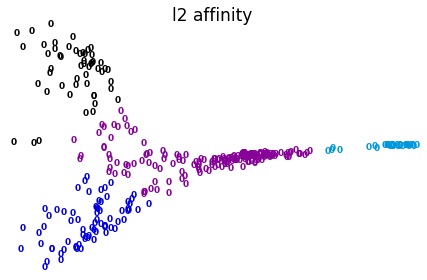

Estimated number of clusters: 4
average : 0.002554s


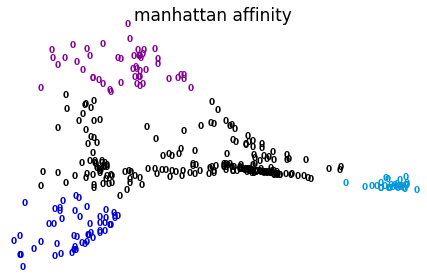

Estimated number of clusters: 4
average : 0.002217s


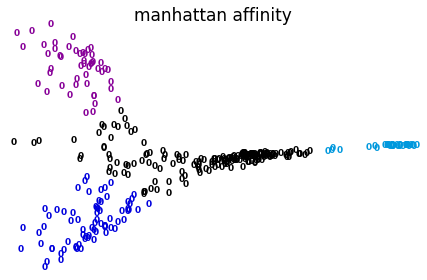

Estimated number of clusters: 4
average : 0.002379s


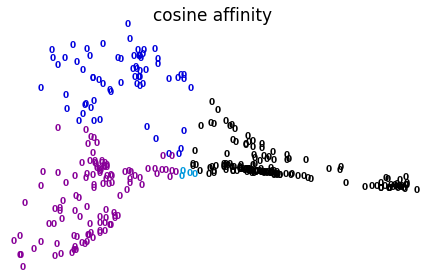

Estimated number of clusters: 4
average : 0.002150s


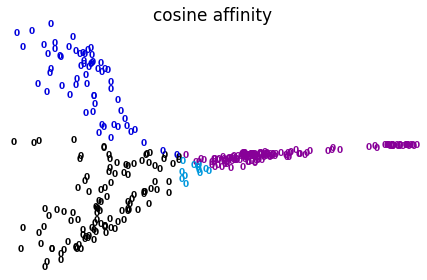

In [394]:
for affinity in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
    test_Agg(tmp_in_flow, 'average', 4, affinity)
    test_Agg(tmp_out_flow, 'average', 4, affinity)

### PCA => Agglomerative Clustering

In [385]:
def test_PCA_Agg(data, n_components, linkage, n_clusters, affinity):
    X = data
    pca = PCA(n_components = n_components)
    X = pca.fit(X).transform(X)
    test_Agg(X, linkage, n_clusters, affinity)

Estimated number of clusters: 4
average : 0.002783s


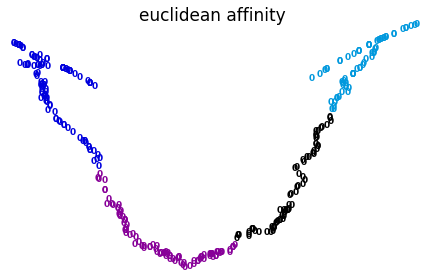

Estimated number of clusters: 4
average : 0.002474s


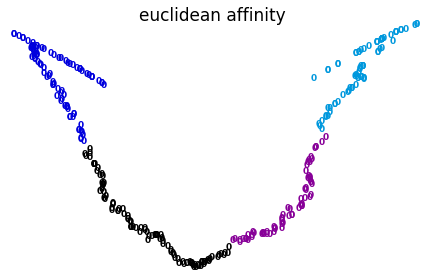

Estimated number of clusters: 4
average : 0.002710s


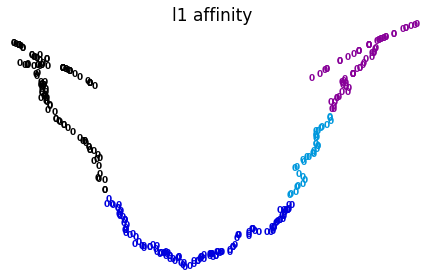

Estimated number of clusters: 4
average : 0.002310s


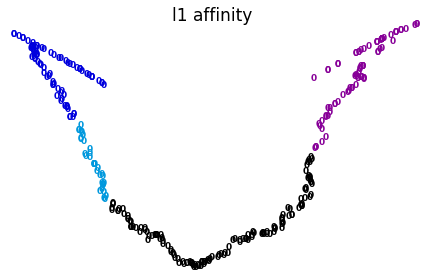

Estimated number of clusters: 4
average : 0.002614s


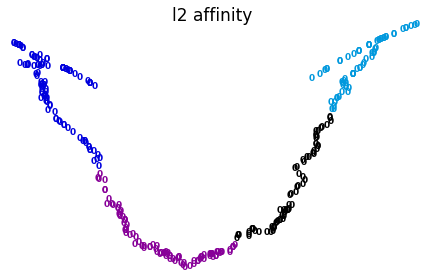

Estimated number of clusters: 4
average : 0.002680s


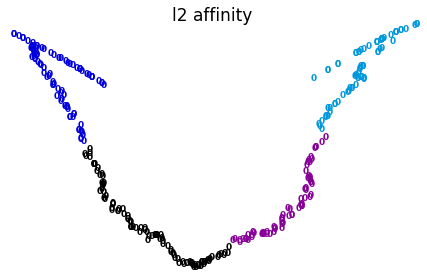

Estimated number of clusters: 4
average : 0.002103s


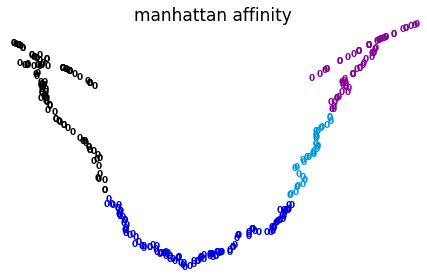

Estimated number of clusters: 4
average : 0.003828s


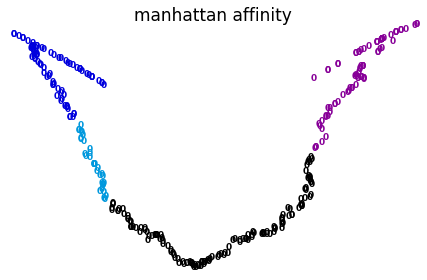

Estimated number of clusters: 4
average : 0.003525s


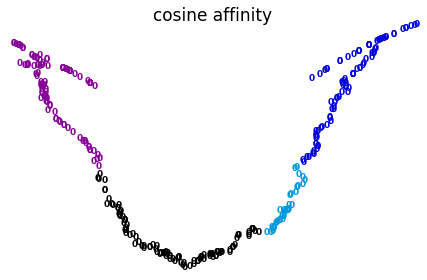

Estimated number of clusters: 4
average : 0.003577s


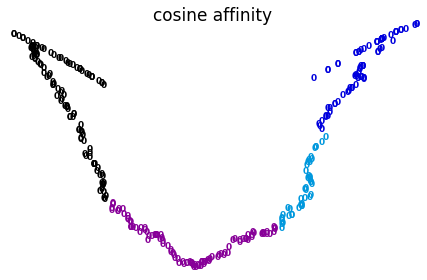

In [386]:
for affinity in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
    test_PCA_Agg(tmp_in_flow, 0.1, 'average', 4, affinity)
    test_PCA_Agg(tmp_out_flow, 0.9, 'average', 4, affinity)